In [10]:
import pandas as pd

ROOT_PATH = "/data/rsg/nlp/yujieq/bms/"

gold = pd.read_csv(ROOT_PATH + 'data/valid_folds.csv')
pred = pd.read_csv(ROOT_PATH + 'output/resnet34_input_288_atomtok_epoch_8/prediction_valid.csv')

In [7]:
image_ids = gold['image_id'].values
gold_smiles = gold['SMILES'].values
pred_smiles = pred['SMILES'].values

errors = []
for i in range(len(image_ids)):
    if gold_smiles[i] != pred_smiles[i]:
        errors.append(i)

print(len(errors), '/', len(image_ids))

35649 / 242419


In [25]:
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
def moltosvg(mol,molSize=(500,300),kekulize=True):
    mc = Chem.Mol(mol.ToBinary())
    if kekulize:
        try:
            Chem.Kekulize(mc)
        except:
            mc = Chem.Mol(mol.ToBinary())
    if not mc.GetNumConformers():
        rdDepictor.Compute2DCoords(mc)
    drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0],molSize[1])
    drawer.DrawMolecule(mc)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    # It seems that the svg renderer used doesn't quite hit the spec.
    # Here are some fixes to make it work in the notebook, although I think
    # the underlying issue needs to be resolved at the generation step
    return svg.replace('svg:','')

000019cc0cd2
gold CC(=O)O[C@H]1CC[C@@]2(C)[C@@H](CC(=O)[C@@H]3[C@@H]4CCC(=O)[C@@]4(C)CC[C@H]32)C1
pred CC(=O)O[C@H]1CC[C@@]2(C)[C@@H](CC(=O)[C@@H]3[C@@H]4CCC(=O)[C@@]4(C)CC[C@@H]32)C1


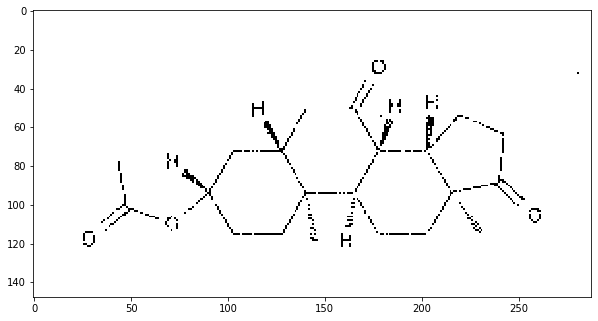

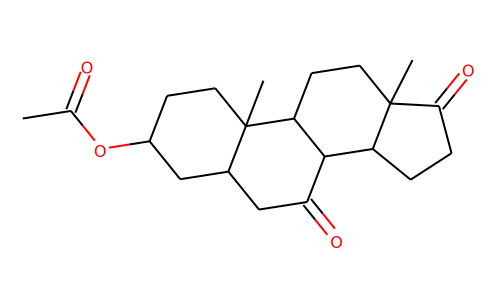

0001183a4c2d
gold CCCCOC1=C(C)C=C(S(C)(C)C)CC1C
pred CCCCOc1c(C)cc([Si](C)(C)C)cc1C


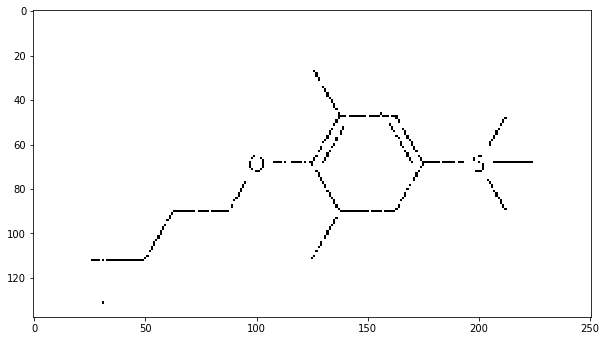

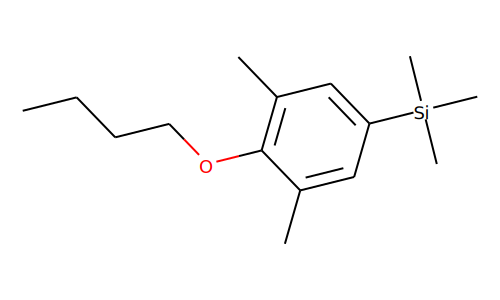

00049942be5e
gold CN(C)C1CC2CN(S(=O)(=O)c3ccc4cc(Cl)ccc4c3)CC(C1)N2C(=O)c1ccc(-c2ccncc2)cc1
pred CN(C)C1CC2CN(S(=O)(=O)c3ccc4cc(Cl)ccc4c3)CC1CN2C(=O)c1ccc(-c2ccncc2)cc1


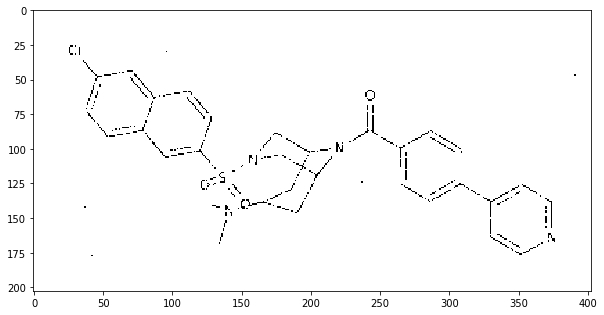

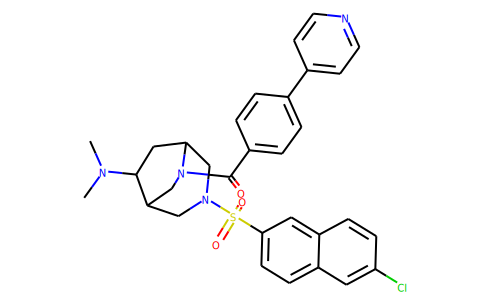

0005a1ea05e1
gold C[C@H](O)CNCc1cc(Br)ccc1OCc1ccc(F)cc1Cl
pred C[C@@H](O)CNCc1cc(Br)ccc1OCc1ccc(F)cc1Cl


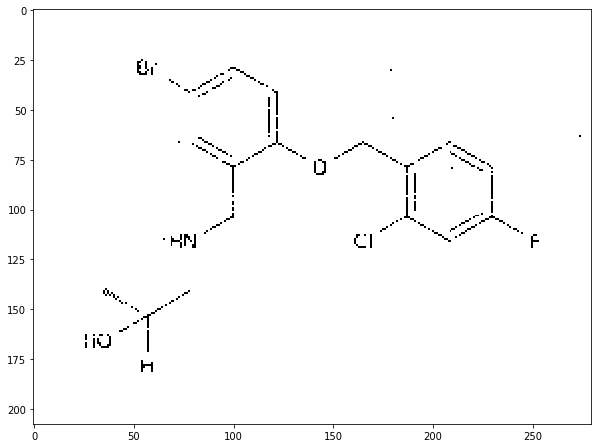

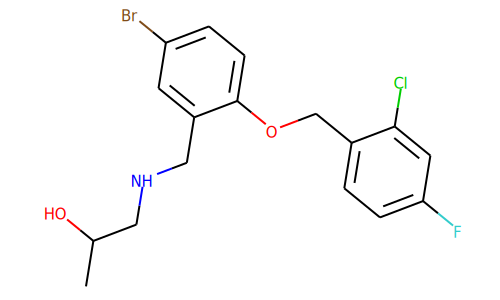

000f2bfdae27
gold COc1c(Br)c([C@@H]2ON=C(C(=O)N/N=C\c3ccc(C(C)(C)C)cc3)[C@@H]2C)c(Br)c2c1OCO2
pred COc1c(Br)c([C@@H]2ON=C(C(=O)N/N=C\c3ccc(C(C)(C)C)cc3)[C@H]2C)c(Br)c2c1OCO2


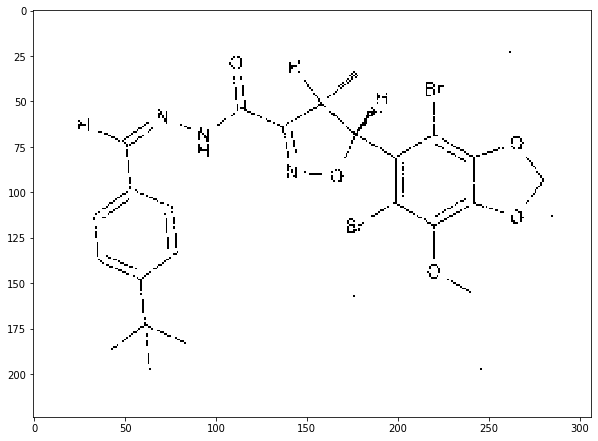

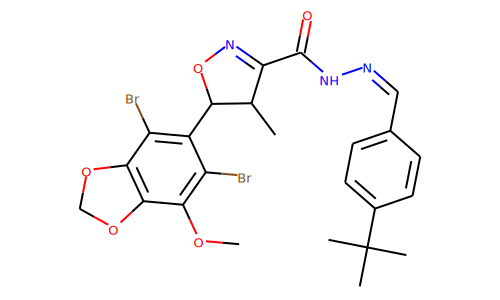

001014689117
gold C=CC[C@H]1[C@H](OCOC)CC=C(C(=O)OC)N1C(=O)OCc1ccccc1
pred C=CC[C@H]1[C@@H](OCOC)CC=C(C(=O)OC)N1C(=O)OCc1ccccc1


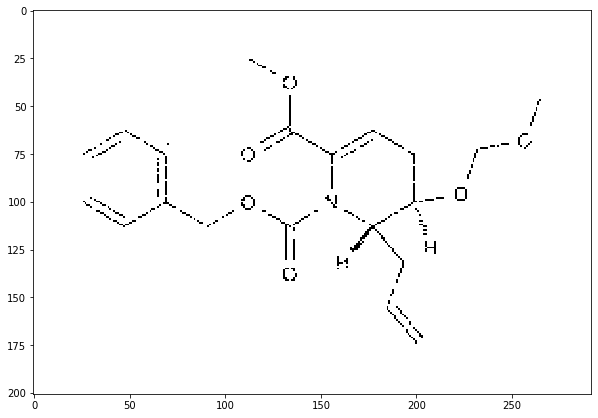

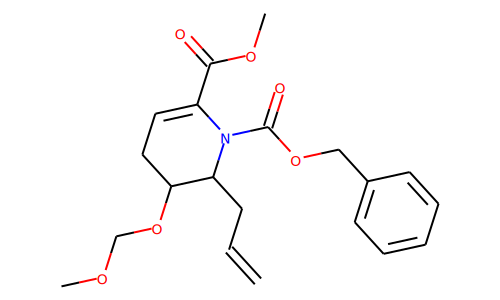

00102b852a13
gold CC(C)(C)OC(=O)/C(C#N)=C1/COCCN1
pred CC(C)(C)OC(=O)/C(C#N)=C1/CNCCN1


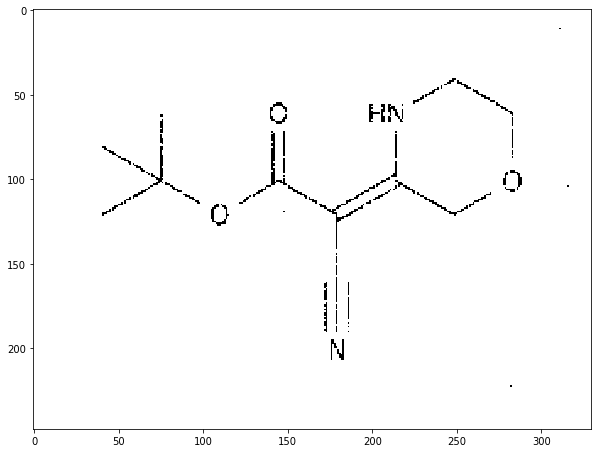

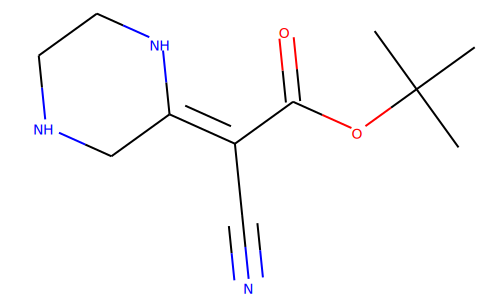

0010c593fcc9
gold C#CCCOC(=O)N(C)[C@@H](CC(C)C)C(=O)OCCCCCCCCCCCCCCC
pred C#CCCOC(=O)N(C)[C@H](CC(C)C)C(=O)OCCCCCCCCCCCCCCC


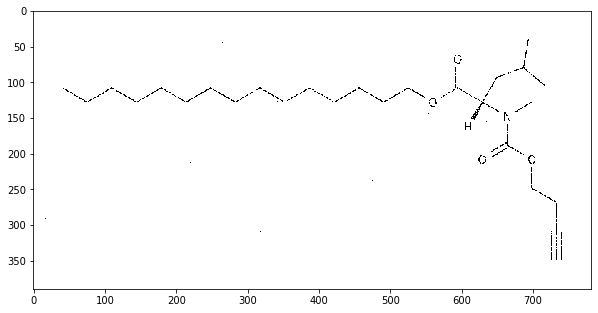

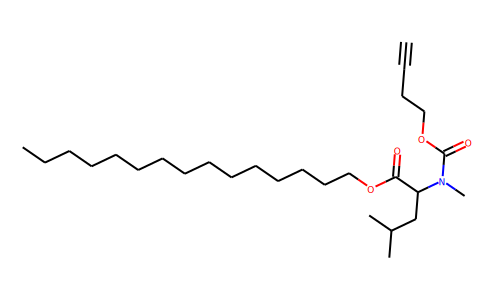

In [26]:
from matplotlib import pyplot as plt
from IPython.display import SVG
import cv2
import rdkit
import rdkit.Chem as Chem
from rdkit.Chem import Draw

def get_train_file_path(image_id):
    return ROOT_PATH + "data/train/{}/{}/{}/{}.png".format(image_id[0], image_id[1], image_id[2], image_id)

for idx in errors[:8]:
    image_id = image_ids[idx]
    gs = gold_smiles[idx]
    ps = pred_smiles[idx]
    print(image_id)
    print('gold', gs)
    print('pred', ps)
    file_path = get_train_file_path(image_id)
    image = cv2.imread(file_path)
    plt.figure(figsize = (10, 10))
    plt.imshow(image)
    plt.show()
    mol = Chem.MolFromSmiles(ps)
    display(SVG(moltosvg(mol)))
#     plt.figure(figsize = (10, 10))
#     plt.imshow(Draw.MolToImage(mol, size=(500,500)))
#     plt.show()